# create figures for med4 DE long term 

In [1]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)
library(circlize)

Warning message:
"package 'DESeq2' was built under R version 4.2.2"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
"package 'BiocGenerics' was built under R version 4.2.1"

Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    exp

In [184]:
library(scales)

Warning message:
"package 'scales' was built under R version 4.2.1"

Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




In [2]:
library(ggrepel)

Warning message:
"package 'ggrepel' was built under R version 4.2.1"


In [126]:
status_palette <- c(
  "Up" = "#CC79A7",        # Green
  "Down" = "#009E73",      # Red
  "DE" = "#0072B2",      # Red
  "Unchanged" = "#e8ecec", # Gray
  "N/A" = "#bfc8c9"        # Light Yellow
)

In [3]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [41]:
df_all_orig = read_csv(file.path('..', 'Enrichment','DE_results', 'MED4_all_FC_results.csv'))



Warning message:
"One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 45475 Columns: 33
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): contrast, protein_id, Assay, contrast1, Name, gene, locus_tag, old...
dbl  (7): logFC, AveExpr, pvalue, padj, start, end, gene_length
lgl  (3): exception, down, up

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [42]:
t(head(df_all_orig,2))

contrast,C2 - C1,C2 - C1
protein_id,WP_011132009.1,WP_011132596.1
logFC,2.602933,1.795646
AveExpr,0.9167156,2.0464881
pvalue,5.951467e-07,8.763244e-07
padj,0.0004868287,0.0004868287
Assay,Proteome,Proteome
contrast1,C2vsC1_prot,C2vsC1_prot
Name,TX50_RS01980,ureC
gene,NA,ureC
locus_tag,TX50_RS01980,TX50_RS05125


In [218]:
#dput(unique(df_de_stats$contrast1))
lookuptable = c(
    "C2vsC1_prot" = 'limitation vs growth', 
    "C3vsC1_prot" = 'other', 
    "C3vsC2_prot" = 'other', 
    "C4vsC1_prot" = 'other', 
    "C4vsC2_prot" = 'other', 
    "C4vsC3_prot" = 'other', 
    "C5vsC1_prot" = 'other', 
    "C5vsC2_prot" = 'other', 
    "C5vsC3_prot" = 'other', 
    "C5vsC4_prot" = 'survival',
    "LATEvsC1_prot" = 'survival vs growth', 
    "LATEvsC2_prot" = 'other', 
    "P2vsP1_prot" = 'death vs growth', 
    "P3vsP1_prot" = 'other', 
    "P5vsP1_prot" = 'other', 
    "C1vsP1_rna" = 'other', 
    "C2vsC1_rna" = 'limitation vs growth', 
    "C3vsC1_rna" = 'other', 
    "C4vsC1_rna" = 'other', 
    "C4vsC3_rna" = 'other', 
    "C5vsC1_rna" = 'other', 
    "C5vsC3_rna" = 'other', 
    "C5vsC4_rna" = 'survival', 
    "LATEvsC1_rna" = 'survival vs growth', 
     "LATEvsC2_rna" = 'other', 
     "LATEvsP1_rna" = 'other',
    "LATEvsP2_rna" = 'survival vs death', 
    "P2vsP1_rna" = 'death vs growth' 
)


In [219]:
df_de_stats = df_all_orig %>% 
    mutate(is_de = padj < 0.05) %>%
    mutate(no_value = is.na(padj)) %>%
    group_by(Assay,contrast1) %>%
    summarise(
        Up=sum(up, na.rm = TRUE),
        Down=sum(down, na.rm = TRUE),
        #DE=sum(is_de, na.rm = TRUE),
        Unchanged=sum(!is_de, na.rm = TRUE),
        'N/A'=sum(no_value, na.rm = TRUE),
       # Total=n(),        
    )
df_de_stats

`summarise()` has grouped output by 'Assay'. You can override using the `.groups` argument.


Assay,contrast1,Up,Down,Unchanged,N/A
<chr>,<chr>,<int>,<int>,<int>,<int>
Proteome,C2vsC1_prot,106,50,1268,0
Proteome,C3vsC1_prot,242,251,931,0
Proteome,C3vsC2_prot,27,55,1342,0
Proteome,C4vsC1_prot,225,203,996,0
Proteome,C4vsC2_prot,193,208,1023,0
Proteome,C4vsC3_prot,179,133,1112,0
Proteome,C5vsC1_prot,241,263,920,0
Proteome,C5vsC2_prot,244,280,900,0
Proteome,C5vsC3_prot,212,236,976,0


In [220]:
df_de_stats_category = df_all_orig %>% 
    mutate(is_de = padj < 0.05) %>%
    mutate(no_value = is.na(padj)) %>%
    group_by(Assay,contrast1, Category) %>%
    summarise(
        Up=sum(up, na.rm = TRUE),
        Down=sum(down, na.rm = TRUE),
        #DE=sum(is_de, na.rm = TRUE),
        Unchanged=sum(!is_de, na.rm = TRUE),
        'N/A'=sum(no_value, na.rm = TRUE),
        #Total=n(),        
        
    )
df_de_stats_category

`summarise()` has grouped output by 'Assay', 'contrast1'. You can override using the `.groups` argument.


Assay,contrast1,Category,Up,Down,Unchanged,N/A
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
Proteome,C2vsC1_prot,AA/Nucleotide,16,0,143,0
Proteome,C2vsC1_prot,AA/Nucleotide;Energy/Carbohydrate/Glycan,6,2,28,0
Proteome,C2vsC1_prot,Energy/Carbohydrate/Glycan,10,3,78,0
Proteome,C2vsC1_prot,Env. Info/Cellular Process,1,2,31,0
Proteome,C2vsC1_prot,Genetic Info,17,21,220,0
Proteome,C2vsC1_prot,Membrane transport,8,2,62,0
Proteome,C2vsC1_prot,Metabolism,8,9,156,0
Proteome,C2vsC1_prot,Nitrogen metabolism,6,0,0,0
Proteome,C2vsC1_prot,Other,24,5,323,0


In [221]:
late_df_all = df_all_orig %>% 
    filter(contrast1 %in% c("C4vsC3_prot",  "C5vsC3_prot", "C5vsC4_prot", 
        "C4vsC3_rna", "C5vsC3_rna", "C5vsC4_rna"
        )) %>%
    group_by(Assay, gene_id) %>%
    summarise(
        is_de = min(padj) < 0.05,
        no_value = all(is.na(padj)),
    )
late_df_all

`summarise()` has grouped output by 'Assay'. You can override using the `.groups` argument.


Assay,gene_id,is_de,no_value
<chr>,<chr>,<lgl>,<lgl>
Proteome,TX50_RS00020,FALSE,FALSE
Proteome,TX50_RS00025,TRUE,FALSE
Proteome,TX50_RS00030,TRUE,FALSE
Proteome,TX50_RS00035,TRUE,FALSE
Proteome,TX50_RS00040,FALSE,FALSE
Proteome,TX50_RS00045,TRUE,FALSE
Proteome,TX50_RS00055,FALSE,FALSE
Proteome,TX50_RS00060,FALSE,FALSE
Proteome,TX50_RS00065,FALSE,FALSE


In [222]:
late_df_p_all = df_all_orig %>% 
    filter(contrast1 %in% c("P3vsP1_prot" , "P5vsP1_prot" 

        )) %>%
    group_by(Assay, gene_id) %>%
    summarise(
        is_de = min(padj) < 0.05,
        no_value = all(is.na(padj)),
    )
late_df_all

`summarise()` has grouped output by 'Assay'. You can override using the `.groups` argument.


Assay,gene_id,is_de,no_value
<chr>,<chr>,<lgl>,<lgl>
Proteome,TX50_RS00020,FALSE,FALSE
Proteome,TX50_RS00025,TRUE,FALSE
Proteome,TX50_RS00030,TRUE,FALSE
Proteome,TX50_RS00035,TRUE,FALSE
Proteome,TX50_RS00040,FALSE,FALSE
Proteome,TX50_RS00045,TRUE,FALSE
Proteome,TX50_RS00055,FALSE,FALSE
Proteome,TX50_RS00060,FALSE,FALSE
Proteome,TX50_RS00065,FALSE,FALSE


In [223]:
df_late_de_stats = late_df_all %>% 
    group_by(Assay) %>%
    summarise(
        DE=sum(is_de, na.rm = TRUE),
        Unchanged=sum(!is_de, na.rm = TRUE),
        'N/A'=sum(no_value, na.rm = TRUE),
       # Total=n(),        
    )
df_late_de_stats

Assay,DE,Unchanged,N/A
<chr>,<int>,<int>,<int>
Proteome,515,909,0
RNA,119,1013,4


In [224]:
df_late_p_de_stats = late_df_p_all %>% 
    group_by(Assay) %>%
    summarise(
        DE=sum(is_de, na.rm = TRUE),
        Unchanged=sum(!is_de, na.rm = TRUE),
        'N/A'=sum(no_value, na.rm = TRUE),
       # Total=n(),        
    )
df_late_p_de_stats

Assay,DE,Unchanged,N/A
<chr>,<int>,<int>,<int>
Proteome,930,494,0


In [225]:
mdf_de_stats= pivot_longer(
    df_de_stats, !Assay & !contrast1,  names_to = 'Status', values_to = 'n'
)

In [226]:
mdf_de_stats = mdf_de_stats %>% mutate(comparison = lookuptable[contrast1])

In [227]:
mdf_de_stats_category = pivot_longer(
    df_de_stats_category, !Assay & !contrast1 & !Category,  names_to = 'Status', values_to = 'n'
)

In [228]:
mdf_de_stats_category = mdf_de_stats_category %>% mutate(comparison = lookuptable[contrast1])

In [229]:
mdf_late_de_stats= pivot_longer(
    df_late_de_stats, !Assay ,  names_to = 'Status', values_to = 'n'
)
mdf_late_de_stats

Assay,Status,n
<chr>,<chr>,<int>
Proteome,DE,515
Proteome,Unchanged,909
Proteome,N/A,0
RNA,DE,119
RNA,Unchanged,1013
RNA,N/A,4


In [230]:
dput(unique(mdf_de_stats$Status))

c("Up", "Down", "Unchanged", "N/A")


In [231]:
mdf_de_stats = mdf_de_stats %>%
    #mutate(Status = factor(Status, levels = c("Up", "Down", "Unchanged", "N/A")))
    mutate(Status = factor(Status, levels = c("Up", "Down", "Unchanged", "N/A")))

In [232]:
mdf_de_stats_category = mdf_de_stats_category %>%
    #mutate(Status = factor(Status, levels = c("Up", "Down", "Unchanged", "N/A")))
    mutate(Status = factor(Status, levels = c("Up", "Down", "Unchanged", "N/A")))

In [233]:
mdf_late_de_stats = mdf_late_de_stats %>%
    #mutate(Status = factor(Status, levels = c("Up", "Down", "Unchanged", "N/A")))
    mutate(Status = factor(Status, levels = c("DE", "Unchanged", "N/A")))

# Create bar charts

In [234]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 300)

Warning message:
"Removed 5 rows containing missing values (`geom_text()`)."
Warning message:
"Removed 5 rows containing missing values (`geom_text()`)."


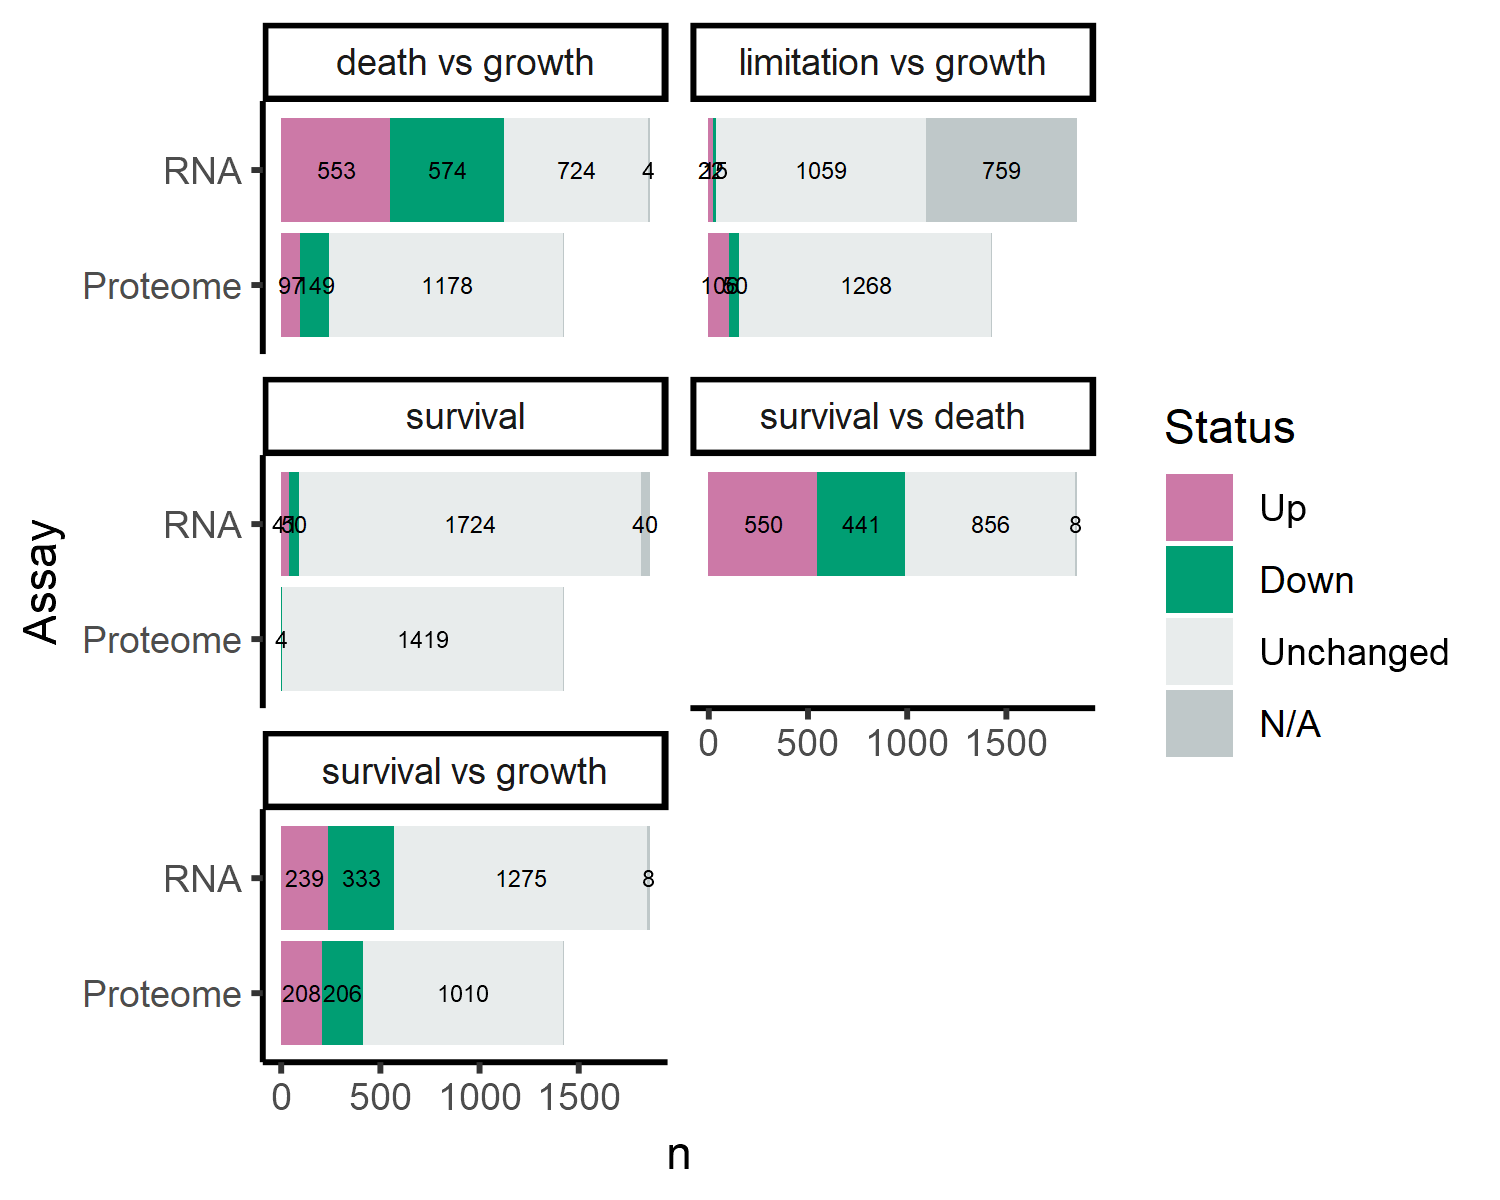

In [235]:
ggplot(mdf_de_stats %>% filter(comparison != 'other'), aes(y = Assay, x = n, fill = Status)) +
  geom_col(position = position_stack(reverse = TRUE)) +
  scale_fill_manual(values = status_palette) +
 
  geom_text(
    aes(label = ifelse(n < 3, NA, n)),
    position = position_stack(reverse = TRUE, vjust = 0.5),
   # check_overlap = TRUE,
      size=2,
  ) +
    facet_wrap(~comparison, ncol = 2) +
    theme_classic()
  #labs(title = "Stacked Bar Chart with Labels")
ggsave('figures/MED4_degenes_bars.svg', height = 4, width = 4)

In [236]:
dput(unique(mdf_de_stats_category$Category))
dput(unique(mdf_de_stats_category$comparison))
mdf_de_stats_category = mdf_de_stats_category %>%
    mutate(
        Category = factor(Category, levels=c(
            "Nitrogen metabolism", 
            "Photosynthesis/Carbon fixation", 
            "Energy/Carbohydrate/Glycan", 
            "AA/Nucleotide", 
            "AA/Nucleotide;Energy/Carbohydrate/Glycan", 
            "Membrane transport", 
            "Env. Info/Cellular Process", 
            "Genetic Info", 
            "Metabolism", 
            "Uncharacterized", 
            "high light inducible",        
            "Other"
        )),
        comparison = factor(comparison, levels=c(
            "death vs growth", 
            "limitation vs growth", 
            "survival vs growth", 
            "survival vs death",
            "other"
        ))
    )

c("AA/Nucleotide", "AA/Nucleotide;Energy/Carbohydrate/Glycan", 
"Energy/Carbohydrate/Glycan", "Env. Info/Cellular Process", "Genetic Info", 
"Membrane transport", "Metabolism", "Nitrogen metabolism", "Other", 
"Photosynthesis/Carbon fixation", "Uncharacterized", "high light inducible"
)
c("limitation vs growth", "other", "survival", "survival vs growth", 
"death vs growth", "survival vs death")


Warning message:
"Removed 121 rows containing missing values (`geom_text()`)."
Warning message:
"Removed 121 rows containing missing values (`geom_text()`)."


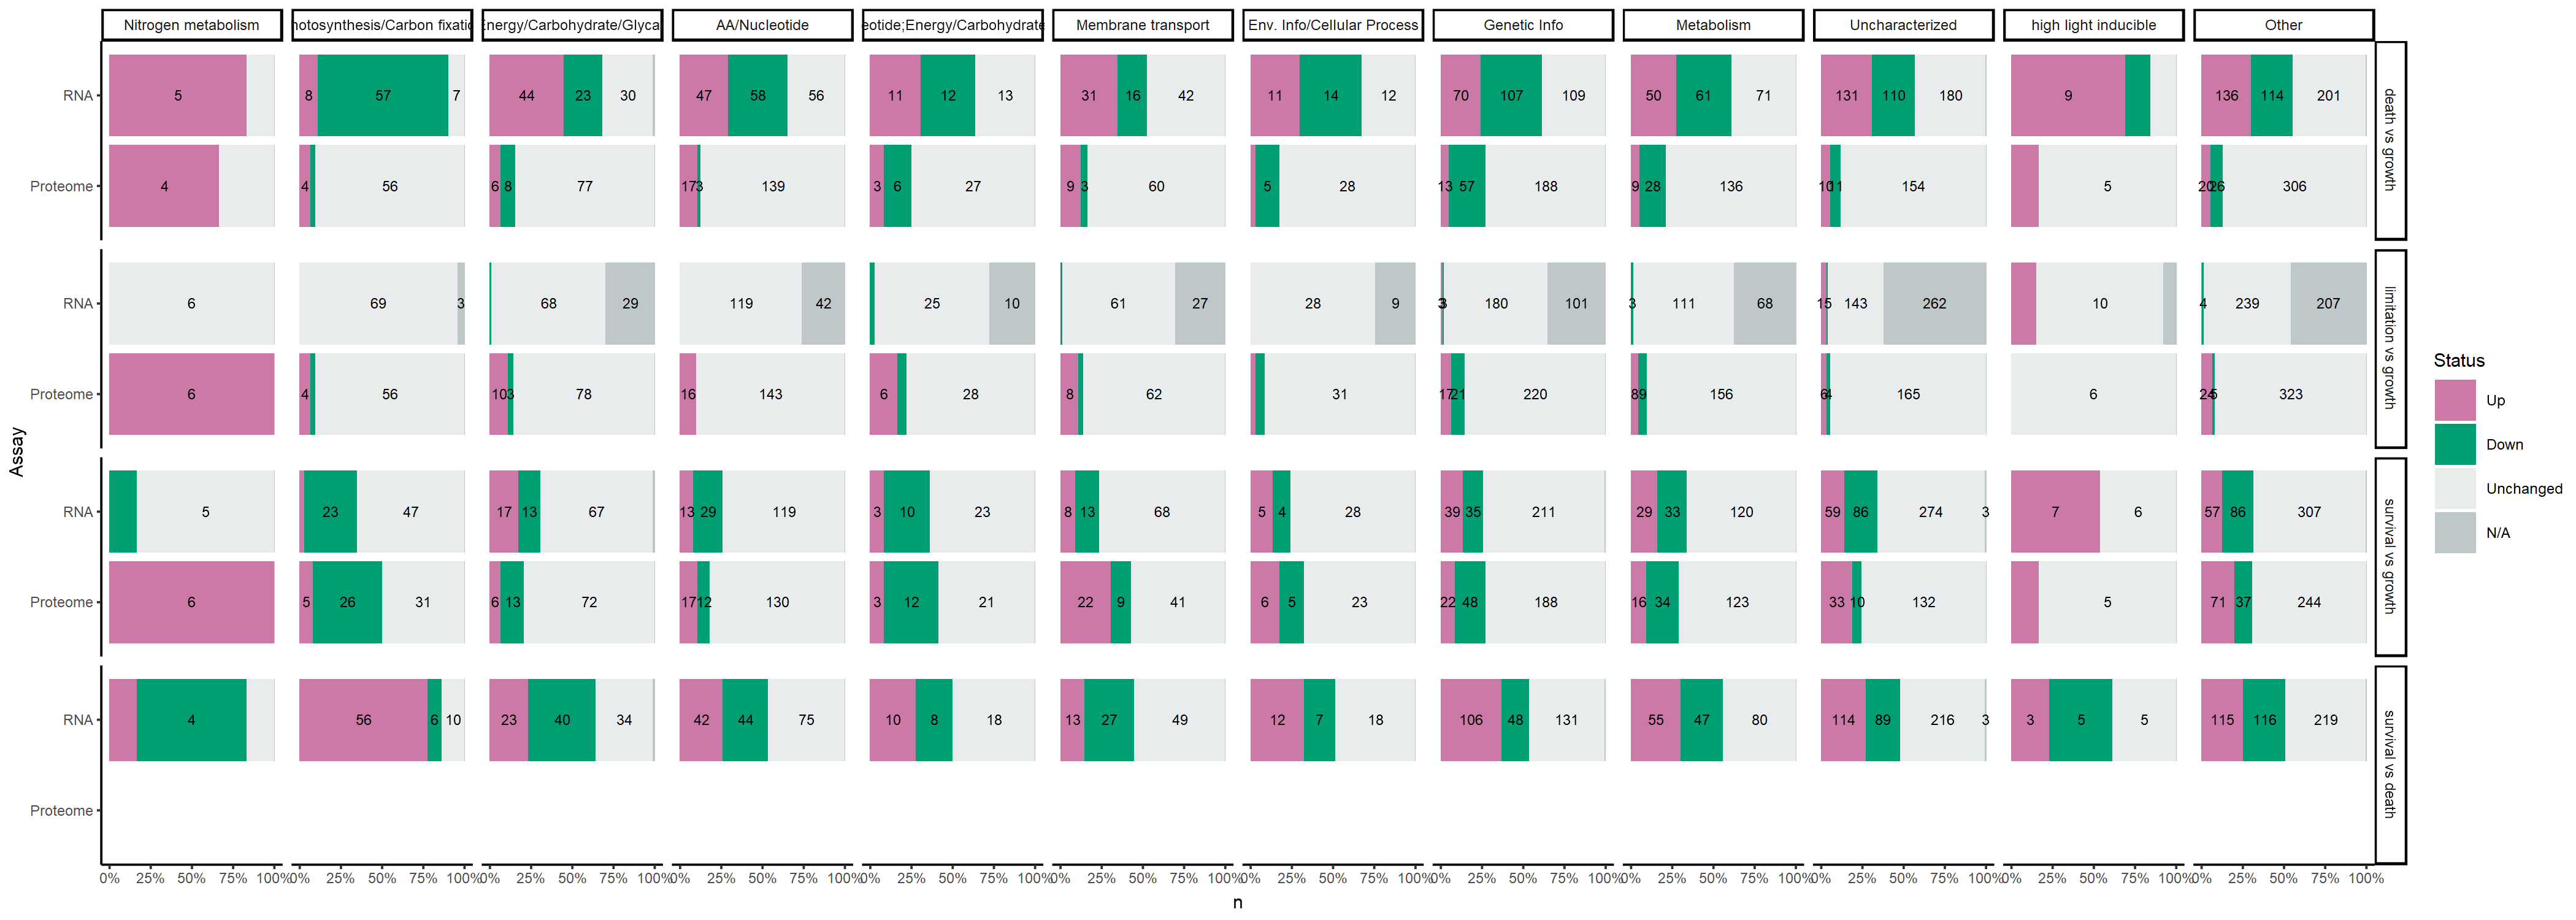

In [237]:
options(repr.plot.width = 14, repr.plot.height = 5, repr.plot.res = 300)

ggplot(mdf_de_stats_category %>% filter(comparison != 'other'), aes(y = Assay, x = n, fill = Status)) +
  geom_col(position = position_fill(reverse = TRUE)) +
  scale_fill_manual(values = status_palette) +
 
  geom_text(
    aes(label = ifelse(n < 3, NA, n)),
    position = position_fill(reverse = TRUE, vjust = 0.5),
   # check_overlap = TRUE,
      size=2,
  ) +
    facet_grid(rows=vars(comparison), cols=vars(Category)) +
    scale_x_continuous(labels = label_percent()) +
    theme_classic(base_size=7)
  #labs(title = "Stacked Bar Chart with Labels")
ggsave('figures/MED4_degenes_category_bars.svg', height = 4, width = 10)

Warning message:
"Removed 1 rows containing missing values (`geom_text()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_text()`)."


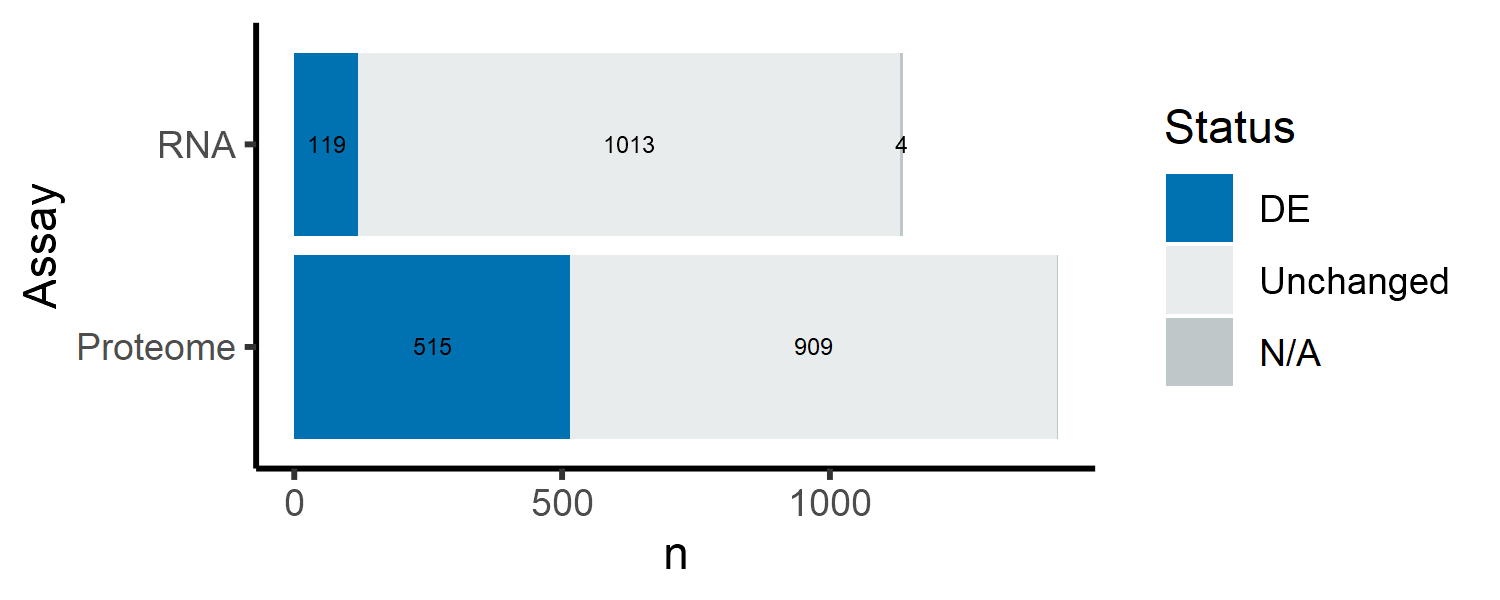

In [166]:
ggplot(mdf_late_de_stats, aes(y = Assay, x = n, fill = Status)) +
  geom_col(position = position_stack(reverse = TRUE)) +
  scale_fill_manual(values = status_palette) +
 
  geom_text(
    aes(label = ifelse(n < 3, NA, n)),
    position = position_stack(reverse = TRUE, vjust = 0.5),
   # check_overlap = TRUE,
      size=2,
  ) +
    theme_classic()
  #labs(title = "Stacked Bar Chart with Labels")
ggsave('figures/MED4_degenes_late_bars.svg', height = 1.2, width = 3)


In [106]:
mdf_de_stats %>% filter(comparison != 'other') %>% count(comparison, contrast1)

Assay,comparison,contrast1,n
<chr>,<chr>,<chr>,<int>
Proteome,death vs growth,P2vsP1_prot,4
Proteome,death vs limitation,C2vsC1_prot,4
Proteome,survival vs growth,LATEvsC1_prot,4
RNA,death vs growth,P2vsP1_rna,4
RNA,death vs limitation,C2vsC1_rna,4
RNA,survival vs death,LATEvsP2_rna,4
RNA,survival vs growth,LATEvsC1_rna,4


In [167]:
unique(df_all_orig$Category)

[1] "Nitrogen metabolism"                     
 [2] "AA/Nucleotide"                           
 [3] "Photosynthesis/Carbon fixation"          
 [4] "Membrane transport"                      
 [5] "Genetic Info"                            
 [6] "Other"                                   
 [7] "Env. Info/Cellular Process"              
 [8] "Metabolism"                              
 [9] "Energy/Carbohydrate/Glycan"              
[10] "AA/Nucleotide;Energy/Carbohydrate/Glycan"
[11] "Uncharacterized"                         
[12] "high light inducible"

In [188]:
help(theme_classic)

ggtheme {ggplot2},R Documentation
base_size,"base font size, given in pts."
base_family,base font family
base_line_size,base size for line elements
base_rect_size,base size for rect elements
